# Adam George
## On my honor, as a student, I have neither given nor received unauthorized aid on this academic work.

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.neural_network import MLPClassifier


#ensemble classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Data Import

In [147]:
df=pd.read_excel("train_test_dataset.xlsx")
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194


# Data Viewing

In [148]:
df.head(15)

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194
5,611B52LL,1,0,0,1,0,0,15,2,0,77,0,,0,,0.0,,54,92
6,612W26VA,1,0,1,0,0,0,15,4,0,67,1,1,1,,NaN,,63,129
7,594Y59EZ,0,1,1,0,0,1,15,6,1,76,5,NaN,1,1,0.0,,50,483
8,610K33YD,1,1,0,0,0,1,25,4,1,,,NaN,,0,NaN,,51,168
9,716W84WL,1,0,1,1,0,0,15,3,1,54,3,,0,,NaN,,51,90


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 19 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null object
INCOME      9216 non-null object
CHILD       4549 non-null object
GNDR        9216 non-null object
OWNHOME     9216 non-null object
SPORT       4273 non-null float64
COMP        9216 non-null object
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(1), int64(11), object(7)
memory usage: 1.3+ MB


In [150]:
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE            0
INCOME         0
CHILD       4667
GNDR           0
OWNHOME        0
SPORT       4943
COMP           0
PCTMARR        0
HOMEVAL        0
dtype: int64

# Data Processing

###### Converting null values to NaN's.

In [151]:
df = df.replace(r'^\s+$', np.nan, regex=True)

In [152]:
df.head(25)

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,NaN,0.0,1.0,NaN,NaN,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,NaN,NaN,NaN,0.0,0.0,NaN,1.0,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,NaN,0.0,1.0,0.0,NaN,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,NaN,1.0,1.0,0.0,1.0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,NaN,1.0,1.0,0.0,NaN,65,194
5,611B52LL,1,0,0,1,0,0,15,2,0,77.0,0.0,NaN,0.0,NaN,0.0,NaN,54,92
6,612W26VA,1,0,1,0,0,0,15,4,0,67.0,1.0,1.0,1.0,NaN,NaN,NaN,63,129
7,594Y59EZ,0,1,1,0,0,1,15,6,1,76.0,5.0,NaN,1.0,1.0,0.0,NaN,50,483
8,610K33YD,1,1,0,0,0,1,25,4,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,51,168
9,716W84WL,1,0,1,1,0,0,15,3,1,54.0,3.0,NaN,0.0,NaN,NaN,NaN,51,90


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 19 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         7223 non-null float64
INCOME      7272 non-null float64
CHILD       582 non-null float64
GNDR        8718 non-null float64
OWNHOME     7217 non-null float64
SPORT       4273 non-null float64
COMP        1009 non-null float64
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(7), int64(11), object(1)
memory usage: 1.3+ MB


In [154]:
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE         1993
INCOME      1944
CHILD       8634
GNDR         498
OWNHOME     1999
SPORT       4943
COMP        8207
PCTMARR        0
HOMEVAL        0
dtype: int64

In [155]:
df.describe()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
count,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,7223.000000,7272.000000,582.0,8718.000000,7217.000000,4273.000000,1009.0,9216.000000,9216.000000
mean,0.500000,0.337023,0.510525,0.636719,0.291124,0.480252,19.963108,6.378038,0.489475,61.392912,2.882151,1.0,0.447236,0.718581,0.056869,1.0,58.228516,112.111220
std,0.500027,0.472718,0.499916,0.480971,0.454305,0.499637,8.820188,2.873927,0.499916,16.594747,1.843857,0.0,0.497237,0.449722,0.250085,0.0,12.902173,92.292223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,0.000000,12.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,4.000000,0.000000,48.000000,1.000000,1.0,0.000000,0.000000,0.000000,1.0,52.000000,56.000000
50%,0.500000,0.000000,1.000000,1.000000,0.000000,0.000000,15.000000,6.000000,0.000000,63.000000,3.000000,1.0,0.000000,1.000000,0.000000,1.0,61.000000,81.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,9.000000,1.000000,75.000000,4.000000,1.0,1.000000,1.000000,0.000000,1.0,67.000000,132.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000,24.000000,1.000000,97.000000,6.000000,1.0,1.000000,1.000000,3.000000,1.0,99.000000,600.000000


###### Combining all Year 1 Game Columns into 1 Column. 

In [156]:
df['Y1Games'] = df['Y1G5'] + df['Y1G4'] + df['Y1G3'] + df['Y1G2'] + df['Y1G1']

In [157]:
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL,Y1Games
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,NaN,0.0,1.0,NaN,NaN,77,203,3
1,298S54OK,1,0,0,1,0,1,15,3,1,NaN,NaN,NaN,0.0,0.0,NaN,1.0,53,68,2
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,NaN,0.0,1.0,0.0,NaN,50,38,2
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,NaN,1.0,1.0,0.0,1.0,60,68,3
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,NaN,1.0,1.0,0.0,NaN,65,194,1


###### Dropping Year 1 Game Columns as they are no longer necessary. 

In [158]:
df = df.drop(["Y1G5","Y1G4","Y1G3","Y1G2","Y1G1"], axis=1)

In [159]:
df.head()

,FAKEID,Y2defect,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL,Y1Games
0,580V74KT,0,15,8,1,94.0,4.0,NaN,0.0,1.0,NaN,NaN,77,203,3
1,298S54OK,1,15,3,1,NaN,NaN,NaN,0.0,0.0,NaN,1.0,53,68,2
2,268D25AO,1,15,11,1,67.0,2.0,NaN,0.0,1.0,0.0,NaN,50,38,2
3,312Q12WV,1,15,4,0,62.0,4.0,NaN,1.0,1.0,0.0,1.0,60,68,3
4,420R23VB,0,15,5,0,89.0,4.0,NaN,1.0,1.0,0.0,NaN,65,194,1


###### Re-Arranging Columns to make more sense.

In [160]:
df = df[['FAKEID','Y2defect','Y1price','Y1Games','YEARS','BACKER','AGE','INCOME','CHILD'
         ,'GNDR','OWNHOME','HOMEVAL','SPORT','COMP','PCTMARR']]

In [161]:
df.head()

,FAKEID,Y2defect,Y1price,Y1Games,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,HOMEVAL,SPORT,COMP,PCTMARR
0,580V74KT,0,15,3,8,1,94.0,4.0,NaN,0.0,1.0,203,NaN,NaN,77
1,298S54OK,1,15,2,3,1,NaN,NaN,NaN,0.0,0.0,68,NaN,1.0,53
2,268D25AO,1,15,2,11,1,67.0,2.0,NaN,0.0,1.0,38,0.0,NaN,50
3,312Q12WV,1,15,3,4,0,62.0,4.0,NaN,1.0,1.0,68,0.0,1.0,60
4,420R23VB,0,15,1,5,0,89.0,4.0,NaN,1.0,1.0,194,0.0,NaN,65


In [162]:
df.describe()

,Y2defect,Y1price,Y1Games,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,HOMEVAL,SPORT,COMP,PCTMARR
count,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,7223.000000,7272.000000,582.0,8718.000000,7217.000000,9216.000000,4273.000000,1009.0,9216.000000
mean,0.500000,19.963108,2.255642,6.378038,0.489475,61.392912,2.882151,1.0,0.447236,0.718581,112.111220,0.056869,1.0,58.228516
std,0.500027,8.820188,1.054032,2.873927,0.499916,16.594747,1.843857,0.0,0.497237,0.449722,92.292223,0.250085,0.0,12.902173
min,0.000000,15.000000,1.000000,2.000000,0.000000,12.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,15.000000,1.000000,4.000000,0.000000,48.000000,1.000000,1.0,0.000000,0.000000,56.000000,0.000000,1.0,52.000000
50%,0.500000,15.000000,2.000000,6.000000,0.000000,63.000000,3.000000,1.0,0.000000,1.000000,81.000000,0.000000,1.0,61.000000
75%,1.000000,25.000000,3.000000,9.000000,1.000000,75.000000,4.000000,1.0,1.000000,1.000000,132.000000,0.000000,1.0,67.000000
max,1.000000,50.000000,5.000000,24.000000,1.000000,97.000000,6.000000,1.0,1.000000,1.000000,600.000000,3.000000,1.0,99.000000


###### It looks like the SPORT column has a Max Value of 3, when it should only have 0 and 1's.

In [163]:
df['SPORT'] = df['SPORT'].replace(3, np.nan)

In [164]:
df.describe()

,Y2defect,Y1price,Y1Games,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,HOMEVAL,SPORT,COMP,PCTMARR
count,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,7223.000000,7272.000000,582.0,8718.000000,7217.000000,9216.000000,4271.000000,1009.0,9216.000000
mean,0.500000,19.963108,2.255642,6.378038,0.489475,61.392912,2.882151,1.0,0.447236,0.718581,112.111220,0.055491,1.0,58.228516
std,0.500027,8.820188,1.054032,2.873927,0.499916,16.594747,1.843857,0.0,0.497237,0.449722,92.292223,0.241894,0.0,12.902173
min,0.000000,15.000000,1.000000,2.000000,0.000000,12.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,15.000000,1.000000,4.000000,0.000000,48.000000,1.000000,1.0,0.000000,0.000000,56.000000,0.000000,1.0,52.000000
50%,0.500000,15.000000,2.000000,6.000000,0.000000,63.000000,3.000000,1.0,0.000000,1.000000,81.000000,0.000000,1.0,61.000000
75%,1.000000,25.000000,3.000000,9.000000,1.000000,75.000000,4.000000,1.0,1.000000,1.000000,132.000000,0.000000,1.0,67.000000
max,1.000000,50.000000,5.000000,24.000000,1.000000,97.000000,6.000000,1.0,1.000000,1.000000,600.000000,2.000000,1.0,99.000000


In [165]:
df['SPORT'] = df['SPORT'].replace(2, np.nan)

In [166]:
df.describe()

,Y2defect,Y1price,Y1Games,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,HOMEVAL,SPORT,COMP,PCTMARR
count,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,7223.000000,7272.000000,582.0,8718.000000,7217.000000,9216.000000,4258.000000,1009.0,9216.000000
mean,0.500000,19.963108,2.255642,6.378038,0.489475,61.392912,2.882151,1.0,0.447236,0.718581,112.111220,0.049554,1.0,58.228516
std,0.500027,8.820188,1.054032,2.873927,0.499916,16.594747,1.843857,0.0,0.497237,0.449722,92.292223,0.217047,0.0,12.902173
min,0.000000,15.000000,1.000000,2.000000,0.000000,12.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,15.000000,1.000000,4.000000,0.000000,48.000000,1.000000,1.0,0.000000,0.000000,56.000000,0.000000,1.0,52.000000
50%,0.500000,15.000000,2.000000,6.000000,0.000000,63.000000,3.000000,1.0,0.000000,1.000000,81.000000,0.000000,1.0,61.000000
75%,1.000000,25.000000,3.000000,9.000000,1.000000,75.000000,4.000000,1.0,1.000000,1.000000,132.000000,0.000000,1.0,67.000000
max,1.000000,50.000000,5.000000,24.000000,1.000000,97.000000,6.000000,1.0,1.000000,1.000000,600.000000,1.000000,1.0,99.000000


###### Went ahead and replaced 2 and 3 Values in the SPORT column with NaN.
###### AGE needs to be turned into an INT if it is to be used.

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 15 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1price     9216 non-null int64
Y1Games     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         7223 non-null float64
INCOME      7272 non-null float64
CHILD       582 non-null float64
GNDR        8718 non-null float64
OWNHOME     7217 non-null float64
HOMEVAL     9216 non-null int64
SPORT       4258 non-null float64
COMP        1009 non-null float64
PCTMARR     9216 non-null int64
dtypes: float64(7), int64(7), object(1)
memory usage: 1.1+ MB


In [168]:
df.head()

,FAKEID,Y2defect,Y1price,Y1Games,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,HOMEVAL,SPORT,COMP,PCTMARR
0,580V74KT,0,15,3,8,1,94.0,4.0,NaN,0.0,1.0,203,NaN,NaN,77
1,298S54OK,1,15,2,3,1,NaN,NaN,NaN,0.0,0.0,68,NaN,1.0,53
2,268D25AO,1,15,2,11,1,67.0,2.0,NaN,0.0,1.0,38,0.0,NaN,50
3,312Q12WV,1,15,3,4,0,62.0,4.0,NaN,1.0,1.0,68,0.0,1.0,60
4,420R23VB,0,15,1,5,0,89.0,4.0,NaN,1.0,1.0,194,0.0,NaN,65


In [169]:
df = df[pd.notnull(df['AGE'])]

In [170]:
df['AGE'] = df['AGE'].astype(int)

In [171]:
df = df[pd.notnull(df['INCOME'])]

In [172]:
df['INCOME'] = df['INCOME'].astype(int)

In [173]:
df = df[pd.notnull(df['GNDR'])]

In [174]:
df['GNDR'] = df['GNDR'].astype(int)

In [175]:
df.Y2defect.unique()

array([0, 1], dtype=int64)

###### Edited Null Values in variables, and converted Age, Income and Gender to int.

In [176]:
df.describe()

,Y2defect,Y1price,Y1Games,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,HOMEVAL,SPORT,COMP,PCTMARR
count,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,530.0,6214.000000,4741.000000,6214.000000,3768.000000,848.0,6214.000000
mean,0.495977,19.942066,2.261506,6.371580,0.480367,61.121017,2.939170,1.0,0.460734,0.984181,110.402800,0.049894,1.0,58.686514
std,0.500024,8.732935,1.047715,2.866329,0.499655,16.557860,1.833615,0.0,0.498496,0.124790,89.354358,0.217755,0.0,12.190051
min,0.000000,15.000000,1.000000,2.000000,0.000000,12.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,15.000000,1.000000,4.000000,0.000000,48.000000,1.000000,1.0,0.000000,1.000000,56.000000,0.000000,1.0,53.000000
50%,0.000000,15.000000,2.000000,6.000000,0.000000,62.000000,3.000000,1.0,0.000000,1.000000,80.000000,0.000000,1.0,61.000000
75%,1.000000,25.000000,3.000000,9.000000,1.000000,75.000000,4.000000,1.0,1.000000,1.000000,129.000000,0.000000,1.0,67.000000
max,1.000000,50.000000,5.000000,23.000000,1.000000,97.000000,6.000000,1.0,1.000000,1.000000,593.000000,1.000000,1.0,89.000000


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6214 entries, 0 to 9215
Data columns (total 15 columns):
FAKEID      6214 non-null object
Y2defect    6214 non-null int64
Y1price     6214 non-null int64
Y1Games     6214 non-null int64
YEARS       6214 non-null int64
BACKER      6214 non-null int64
AGE         6214 non-null int32
INCOME      6214 non-null int32
CHILD       530 non-null float64
GNDR        6214 non-null int32
OWNHOME     4741 non-null float64
HOMEVAL     6214 non-null int64
SPORT       3768 non-null float64
COMP        848 non-null float64
PCTMARR     6214 non-null int64
dtypes: float64(4), int32(3), int64(7), object(1)
memory usage: 703.9+ KB


###### Going to drop some columns with missing values and that I don't find super relevant.

In [178]:
df = df.drop(["FAKEID","CHILD","OWNHOME","SPORT","COMP", "PCTMARR"], axis=1)

In [179]:
df.head()

,Y2defect,Y1price,Y1Games,YEARS,BACKER,AGE,INCOME,GNDR,HOMEVAL
0,0,15,3,8,1,94,4,0,203
2,1,15,2,11,1,67,2,0,38
3,1,15,3,4,0,62,4,1,68
4,0,15,1,5,0,89,4,1,194
5,1,15,1,2,0,77,0,0,92


In [180]:
df.describe()

,Y2defect,Y1price,Y1Games,YEARS,BACKER,AGE,INCOME,GNDR,HOMEVAL
count,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000
mean,0.495977,19.942066,2.261506,6.371580,0.480367,61.121017,2.939170,0.460734,110.402800
std,0.500024,8.732935,1.047715,2.866329,0.499655,16.557860,1.833615,0.498496,89.354358
min,0.000000,15.000000,1.000000,2.000000,0.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,15.000000,1.000000,4.000000,0.000000,48.000000,1.000000,0.000000,56.000000
50%,0.000000,15.000000,2.000000,6.000000,0.000000,62.000000,3.000000,0.000000,80.000000
75%,1.000000,25.000000,3.000000,9.000000,1.000000,75.000000,4.000000,1.000000,129.000000
max,1.000000,50.000000,5.000000,23.000000,1.000000,97.000000,6.000000,1.000000,593.000000


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6214 entries, 0 to 9215
Data columns (total 9 columns):
Y2defect    6214 non-null int64
Y1price     6214 non-null int64
Y1Games     6214 non-null int64
YEARS       6214 non-null int64
BACKER      6214 non-null int64
AGE         6214 non-null int32
INCOME      6214 non-null int32
GNDR        6214 non-null int32
HOMEVAL     6214 non-null int64
dtypes: int32(3), int64(6)
memory usage: 412.6 KB


# Data Visualization

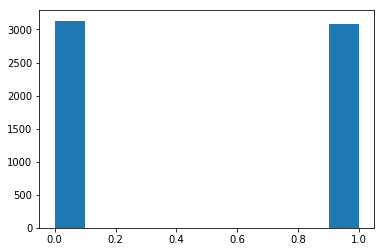

In [182]:
plt.hist(df['Y2defect'])
plt.show()

###### The amount of people who defected and renewed is roughly the same.

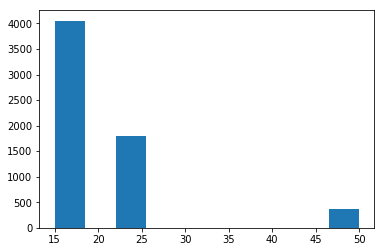

In [183]:
plt.hist(df['Y1price'])
plt.show()

###### Most of the Season Tickets were priced at 15 dollars.

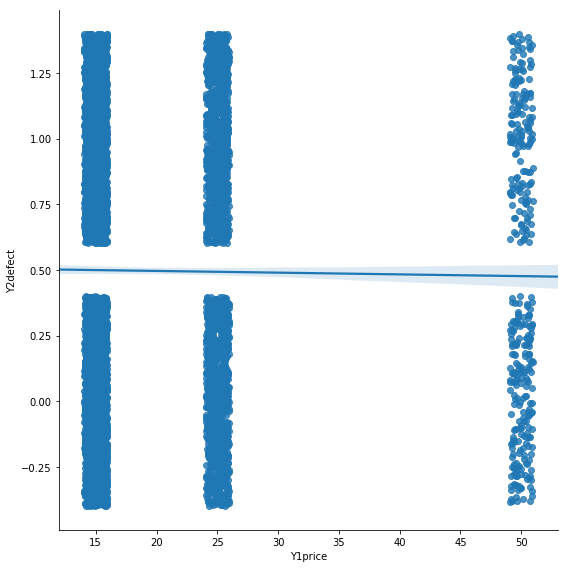

In [184]:
sns.lmplot("Y1price", "Y2defect", df, x_jitter=.95, y_jitter=.40, size=8)

###### There is not really much to be seen here. It looks like there is a slight Negative Correlation between Y1price increasing and Y2defect decreasing.
- As the price goes up, the amount of defect decreases.
    - This surprisingly connotates that as price increases, people are more likely to renew. Not sure how accurate that is.

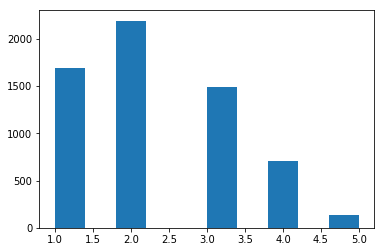

In [185]:
plt.hist(df['Y1Games'])
plt.show()

###### Most people went to 2 games in year 1.

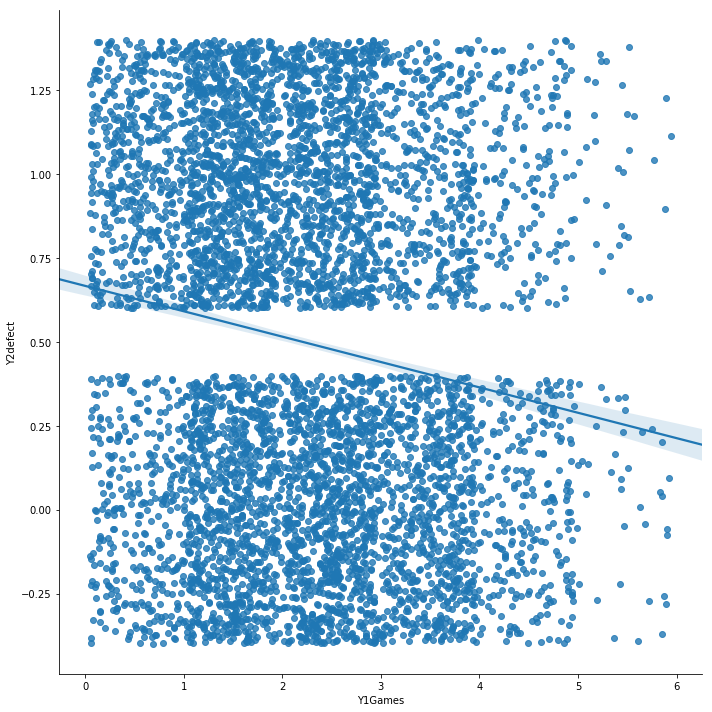

In [186]:
sns.lmplot("Y1Games", "Y2defect", df, x_jitter=.95, y_jitter=.40, size=10)

###### There is a Negative Correlation between Y1Games increasing and Y2defect decreasing.
- As Y1Games increases, Y2defect decreases. 
    - This Negative Correlation seems to connotate that the more games someone attends, the more likely they are to renew.

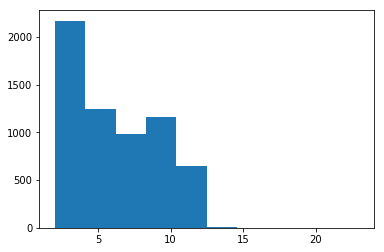

In [187]:
plt.hist(df['YEARS'])
plt.show()

###### It looks like most people have renewed 5 or less years in a row.

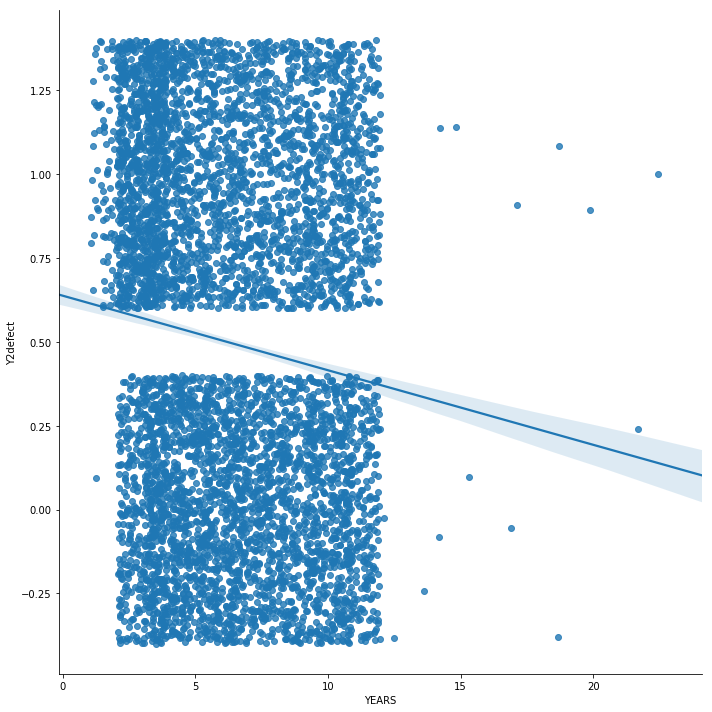

In [188]:
sns.lmplot("YEARS", "Y2defect", df, x_jitter=.95, y_jitter=.40, size=10)

###### There is a Negative Correlation between Years increasing, and Y2defect decreasing.
- As the number of Years as a Season ticket holder increases, the chance for renewal increases as Y2defect decreases.

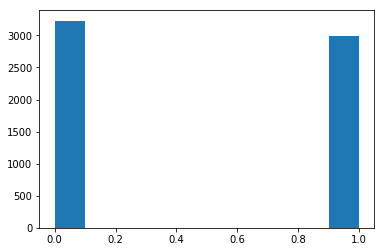

In [189]:
plt.hist(df['BACKER'])
plt.show()

###### There is slightly more people who are NOT backers than there are people who are backers. Looks to be about 3200 to 2800 or so, respectively.

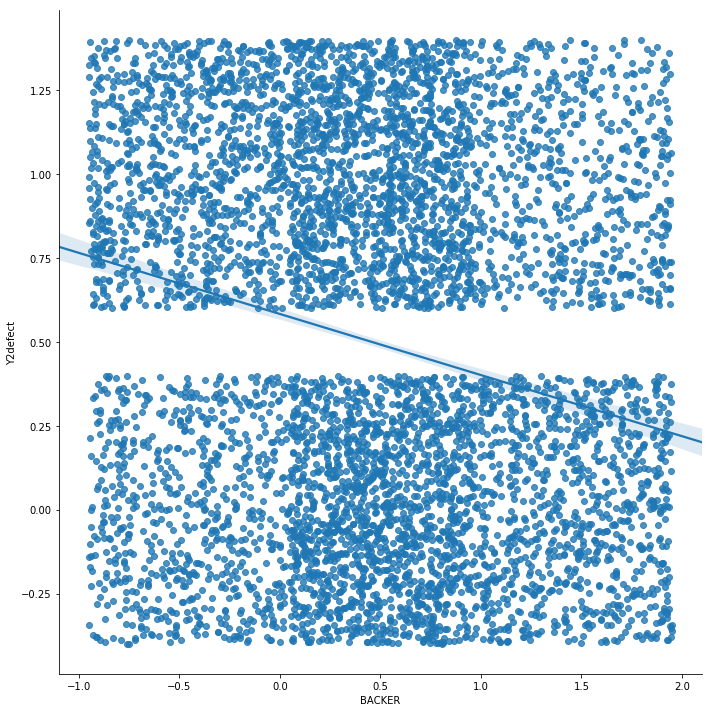

In [190]:
sns.lmplot("BACKER", "Y2defect", df, x_jitter=.95, y_jitter=.40, size=10)

###### There is a Negative Correlation between Backer inceasing and Y2defect decreasing.
- If someone is a a member of the Backer club, they appear to be more likely to renew their season tickets.

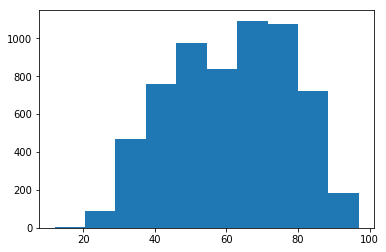

In [191]:
plt.hist(df['AGE'])
plt.show()

###### Most people are between the Ages of 60 and 80.

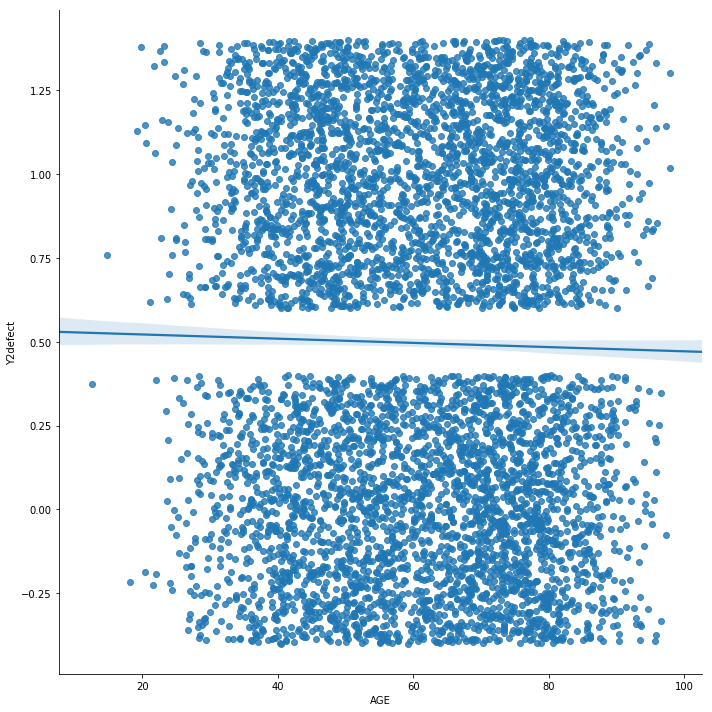

In [258]:
sns.lmplot("AGE", "Y2defect", df, x_jitter=.95, y_jitter=.40, size=10)

###### There is a very slight Negative Correlation between Age increasing and Y2defect decreasing.
- This would connotate that as people get older they are more likely to renew their season tickets.

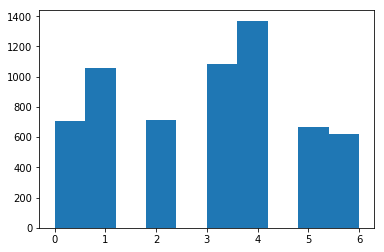

In [193]:
plt.hist(df['INCOME'])
plt.show()

###### Most people have incomes of 1, 3, 4. So pretty low at 1, middle of the line at 3, and slighly above average at 4.

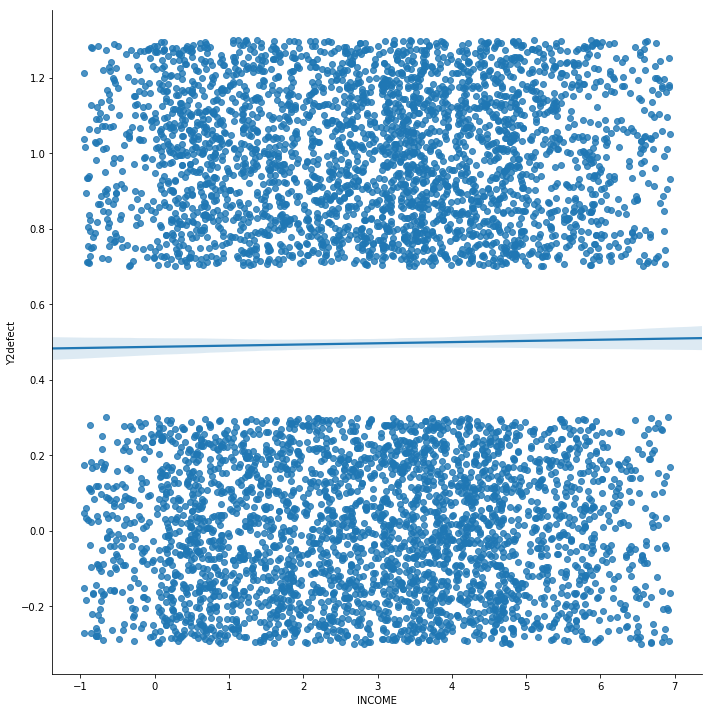

In [194]:
sns.lmplot("INCOME", "Y2defect", df, x_jitter=.95, y_jitter=.30, size=10)

###### There is almost nothing to note here. There is a super slight Positive Correlation between Income increasing and Y2Defect increasing.
- This would connotate that as peoples Income rises, they are more likely to defect.

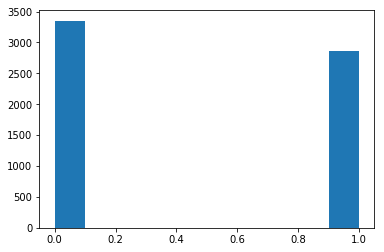

In [195]:
plt.hist(df['GNDR'])
plt.show()

###### There are more females than males.

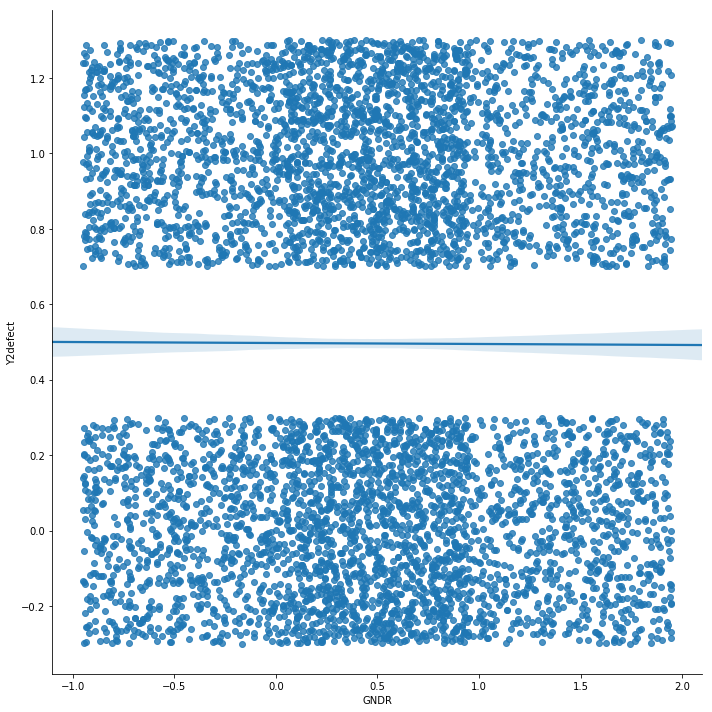

In [196]:
sns.lmplot("GNDR", "Y2defect", df, x_jitter=.95, y_jitter=.30, size=10)

###### It would appear that there is almost no Relationship at all between Gender and the chance for Defecting. 

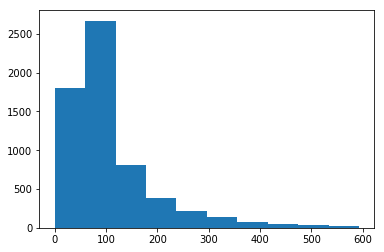

In [197]:
plt.hist(df['HOMEVAL'])
plt.show()

###### Most people have a Home Value of around 100,000.

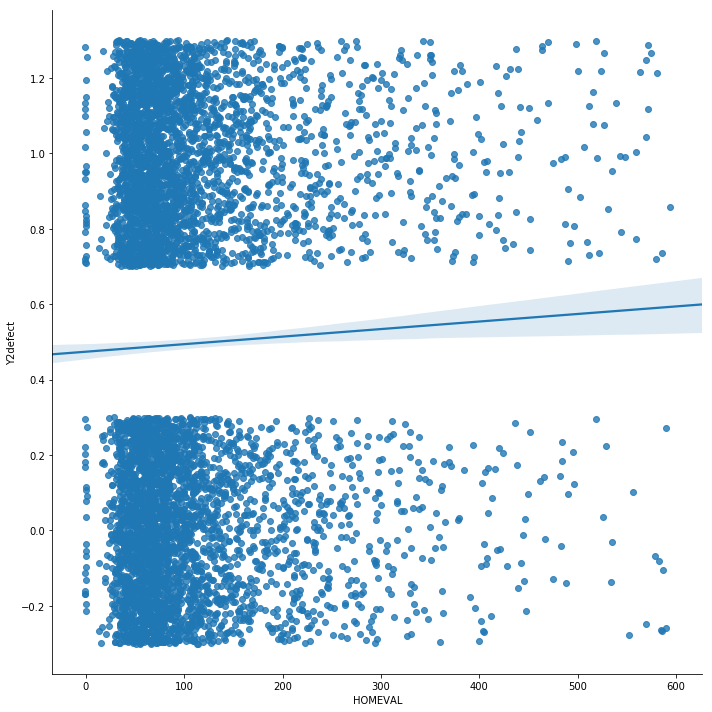

In [198]:
sns.lmplot("HOMEVAL", "Y2defect", df, x_jitter=.95, y_jitter=.30, size=10)

###### There is a Positive Correlation between Home Value increasing and Y2defect increasing.
- This would connotate that as the value of peoples homes goes up, the chance for them to defect also rises.

### Now we are going to see what variables might be closely associated.

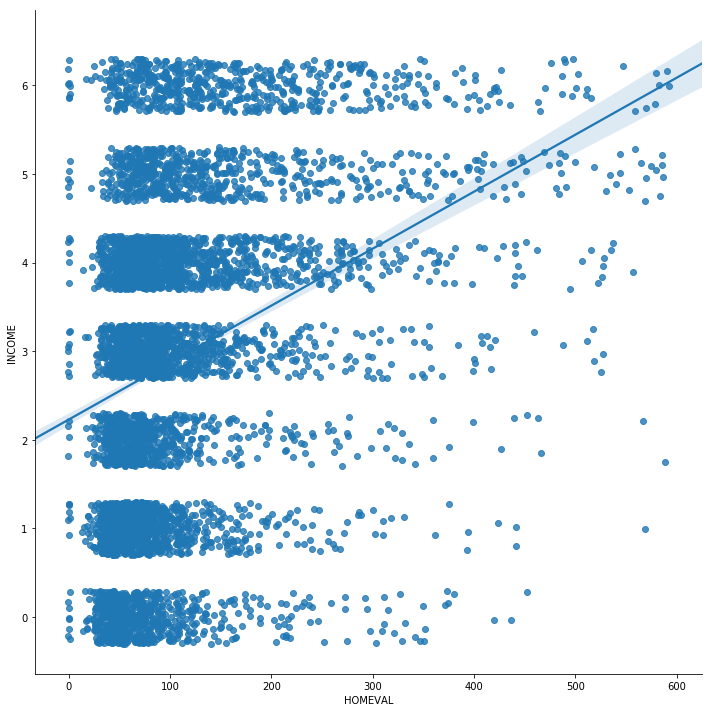

In [199]:
sns.lmplot("HOMEVAL", "INCOME", df, x_jitter=.95, y_jitter=.30, size=10)

###### There is a Strong Positive Correlation between these two variables. We will want to avoid using both of them in creating a model to avoid collinearity.

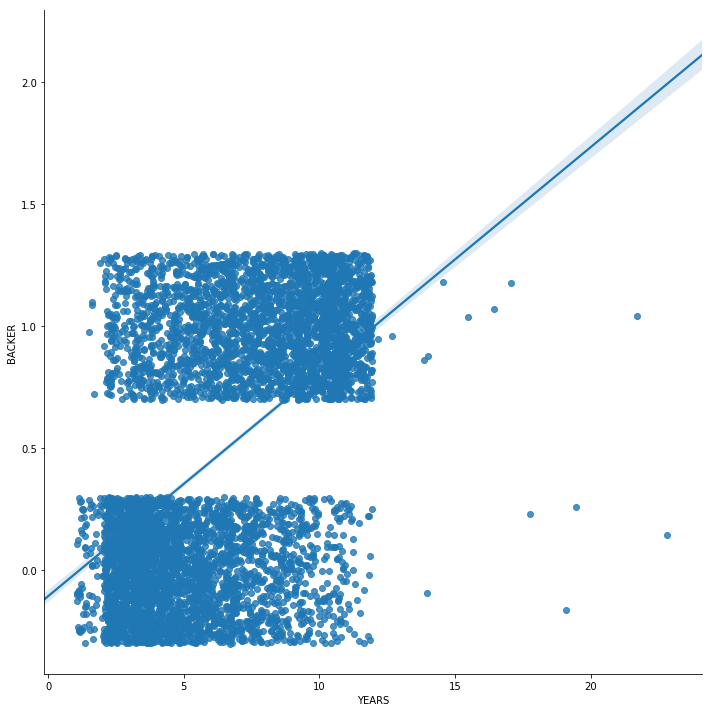

In [200]:
sns.lmplot("YEARS", "BACKER", df, x_jitter=.95, y_jitter=.30, size=10)

###### There is a Strong Positive Correlation between these two variables. We will want to avoid using both of them in creating a model to avoid collinearity.

### In my opinion, these are the only two pairs of Variables we need to consider. 

# Exploratory Data Analysis

In [201]:
from scipy import stats

In [202]:
df.describe()

,Y2defect,Y1price,Y1Games,YEARS,BACKER,AGE,INCOME,GNDR,HOMEVAL
count,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000
mean,0.495977,19.942066,2.261506,6.371580,0.480367,61.121017,2.939170,0.460734,110.402800
std,0.500024,8.732935,1.047715,2.866329,0.499655,16.557860,1.833615,0.498496,89.354358
min,0.000000,15.000000,1.000000,2.000000,0.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,15.000000,1.000000,4.000000,0.000000,48.000000,1.000000,0.000000,56.000000
50%,0.000000,15.000000,2.000000,6.000000,0.000000,62.000000,3.000000,0.000000,80.000000
75%,1.000000,25.000000,3.000000,9.000000,1.000000,75.000000,4.000000,1.000000,129.000000
max,1.000000,50.000000,5.000000,23.000000,1.000000,97.000000,6.000000,1.000000,593.000000


In [203]:
df.head(25)

,Y2defect,Y1price,Y1Games,YEARS,BACKER,AGE,INCOME,GNDR,HOMEVAL
0,0,15,3,8,1,94,4,0,203
2,1,15,2,11,1,67,2,0,38
3,1,15,3,4,0,62,4,1,68
4,0,15,1,5,0,89,4,1,194
5,1,15,1,2,0,77,0,0,92
6,1,15,1,4,0,67,1,1,129
7,0,15,3,6,1,76,5,1,483
9,1,15,2,3,1,54,3,0,90
10,1,25,1,6,0,82,0,1,122
12,1,25,3,5,1,91,0,0,372


(array([ 0.1863534 ,  0.        ,  0.08262449,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.0167364 ]),
 array([ 15. ,  18.5,  22. ,  25.5,  29. ,  32.5,  36. ,  39.5,  43. ,
         46.5,  50. ]),
 <a list of 10 Patch objects>)

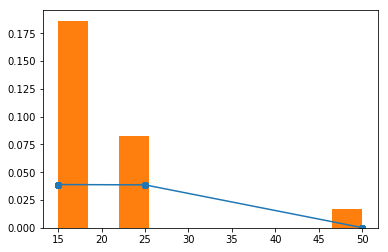

In [204]:
Y1priceNormality = sorted(df['Y1price'])
fit_Y1price = stats.norm.pdf(Y1priceNormality, np.mean(Y1priceNormality), np.std(Y1priceNormality))  #this is a fitting indeed
plt.plot(Y1priceNormality,fit_Y1price,'-o')
plt.hist(Y1priceNormality,normed=True)

###### Normality is very skewed to the lower end.

In [205]:
Y1priceThreeDecimal = stats.normaltest(df['Y1price'])

print "The chi-square statistic is %.3f and the p-value is %.3f." % Y1priceThreeDecimal

The chi-square statistic is 2893.377 and the p-value is 0.000.


###### Our null hypothesis is that there is no difference between high and low game pricing for year 1 when it comes to defecting.

In [272]:
low_Y1price_defect = df[df['Y1price'] <= 21.0]['Y2defect']
high_Y1price_defect = df[df['Y1price'] > 21.0]['Y2defect']
stats.ttest_ind(low_Y1price_defect, high_Y1price_defect)

Ttest_indResult(statistic=-0.80935925800911235, pvalue=0.41833952870844004)

###### Because the pvalue is less than .05, we will reject the null hypothesis in favor of the alternative.
- There is at the least, a slightly significant relationship between high and low pricing for year 1 games, when it comes to defecting.

(array([ 0.679514  ,  0.        ,  0.88228194,  0.        ,  0.        ,
         0.59905053,  0.        ,  0.28323141,  0.        ,  0.05592211]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

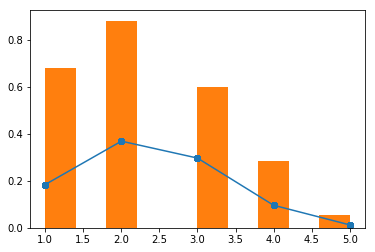

In [207]:
Y1GamesNormality = sorted(df['Y1Games'])
fit_Y1Games = stats.norm.pdf(Y1GamesNormality, np.mean(Y1GamesNormality), np.std(Y1GamesNormality))  #this is a fitting indeed
plt.plot(Y1GamesNormality,fit_Y1Games,'-o')
plt.hist(Y1GamesNormality,normed=True)

###### Normality is slighly skewed to the lower end.

In [208]:
Y1GamesThreeDecimal = stats.normaltest(df['Y1Games'])

print "The chi-square statistic is %.3f and the p-value is %.3f." % Y1GamesThreeDecimal

The chi-square statistic is 347.071 and the p-value is 0.000.


###### Our null hypothesis is that there is no difference between high and low games attended for year 1 when it comes to defecting.

In [277]:
low_Y1Games_defect = df[df['Y1Games'] < 3]['Y2defect']
high_Y1Games_defect = df[df['Y1Games'] >= 3]['Y2defect']
stats.ttest_ind(low_Y1Games_defect, high_Y1Games_defect)

Ttest_indResult(statistic=12.444460591961894, pvalue=3.9214914356162944e-35)

###### Because the pvalue is less than .05, we will reject the null hypothesis in favor of the alternative.
- There is a significant relationship between high and low games attended for year 1 games, when it comes to defecting.

(array([  1.66214539e-01,   9.51001579e-02,   7.49459745e-02,
          8.91228715e-02,   4.98107193e-02,   3.06527503e-04,
          2.29895627e-04,   1.53263752e-04,   1.53263752e-04,
          1.53263752e-04]),
 array([  2. ,   4.1,   6.2,   8.3,  10.4,  12.5,  14.6,  16.7,  18.8,
         20.9,  23. ]),
 <a list of 10 Patch objects>)

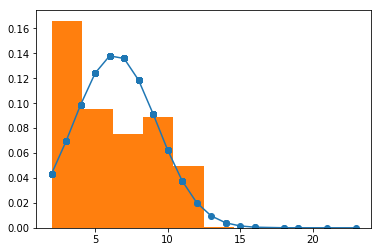

In [210]:
YEARSNormality = sorted(df['YEARS'])
fit_YEARS = stats.norm.pdf(YEARSNormality, np.mean(YEARSNormality), np.std(YEARSNormality))  #this is a fitting indeed
plt.plot(YEARSNormality,fit_YEARS,'-o')
plt.hist(YEARSNormality,normed=True)

###### Normality is fairly normal.

In [211]:
YEARSThreeDecimal = stats.normaltest(df['YEARS'])

print "The chi-square statistic is %.3f and the p-value is %.3f." % YEARSThreeDecimal

The chi-square statistic is 654.982 and the p-value is 0.000.


###### Our null hypothesis is that there is no difference between high and low number of years years as a season ticket holder when it comes to defecting.

In [270]:
low_YEARS_defect = df[df['YEARS'] < 6.0]['Y2defect']
high_YEARS_defect = df[df['YEARS'] >= 6.0]['Y2defect']
stats.ttest_ind(low_YEARS_defect, high_YEARS_defect)

Ttest_indResult(statistic=10.0711167195303, pvalue=1.1255785800280093e-23)

###### Because the pvalue is less than .05, we will reject the null hypothesis.
- There is a significant relationship between high and low number of years as a season ticket holder, when it comes to defecting.

(array([ 5.19633087,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  4.80366913]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

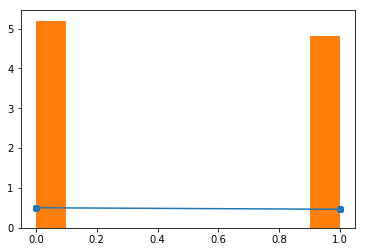

In [213]:
BACKERNormality = sorted(df['BACKER'])
fit_BACKER = stats.norm.pdf(BACKERNormality, np.mean(BACKERNormality), np.std(BACKERNormality))  #this is a fitting indeed
plt.plot(BACKERNormality,fit_BACKER,'-o')
plt.hist(BACKERNormality,normed=True)

###### Not sure there is any normality to be spoken of here. I guess Normal? It is fairly even on both sides. 

In [214]:
BACKERThreeDecimal = stats.normaltest(df['BACKER'])

print "The chi-square statistic is %.3f and the p-value is %.3f." % BACKERThreeDecimal

The chi-square statistic is 6.393 and the p-value is 0.041.


###### Our null hypothesis is that there is no difference between being a Backer or not being a Backer when it comes to defecting.

In [215]:
not_BACKER_defect = df[df['BACKER'] == 0.0]['Y2defect']
is_BACKER_defect = df[df['BACKER'] == 1.0]['Y2defect']
stats.ttest_ind(not_BACKER_defect, is_BACKER_defect)

Ttest_indResult(statistic=14.587186957373135, pvalue=2.0469116471695756e-47)

###### Because the pvalue is less than .05, we will reject the null hypothesis in favor of the alternative.
- There is a significant relationship between being a Backer or not being a Backer, when it comes to defecting.

(array([  9.46629054e-05,   1.66606713e-03,   8.91724569e-03,
          1.44076942e-02,   1.84781991e-02,   1.59033681e-02,
          2.06933111e-02,   2.03525247e-02,   1.36503910e-02,
          3.48359492e-03]),
 array([ 12. ,  20.5,  29. ,  37.5,  46. ,  54.5,  63. ,  71.5,  80. ,
         88.5,  97. ]),
 <a list of 10 Patch objects>)

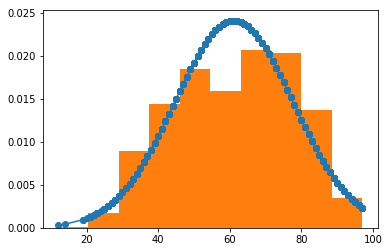

In [216]:
AGENormality = sorted(df['AGE'])
fit_AGE = stats.norm.pdf(AGENormality, np.mean(AGENormality), np.std(AGENormality))  #this is a fitting indeed
plt.plot(AGENormality,fit_AGE,'-o')
plt.hist(AGENormality,normed=True)

###### Normality seems normal.

In [217]:
AGEThreeDecimal = stats.normaltest(df['AGE'])

print "The chi-square statistic is %.3f and the p-value is %.3f." % AGEThreeDecimal

The chi-square statistic is 916.450 and the p-value is 0.000.


###### Our null hypothesis is that there is no difference in Age when it comes to defecting.

In [276]:
low_AGE_defect = df[df['AGE'] < 50]['Y2defect']
high_AGE_defect = df[df['AGE'] >= 50]['Y2defect']
stats.ttest_ind(low_AGE_defect, high_AGE_defect)

Ttest_indResult(statistic=2.3968647048739014, pvalue=0.016565398029866913)

###### Because the pvalue is less than .05, we will reject the null hypothesis.
- There is a significant relationship between high and low Ages, when it comes to defecting.

(array([ 0.18908915,  0.28376784,  0.        ,  0.19096663,  0.        ,
         0.29020491,  0.36744984,  0.        ,  0.1786289 ,  0.16655938]),
 array([ 0. ,  0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ]),
 <a list of 10 Patch objects>)

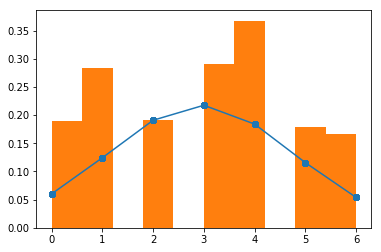

In [219]:
INCOMENormality = sorted(df['INCOME'])
fit_INCOME = stats.norm.pdf(INCOMENormality, np.mean(INCOMENormality), np.std(INCOMENormality))  #this is a fitting indeed
plt.plot(INCOMENormality,fit_INCOME,'-o')
plt.hist(INCOMENormality,normed=True)

###### Normality seems normal.

In [220]:
INCOMEThreeDecimal = stats.normaltest(df['INCOME'])

print "The chi-square statistic is %.3f and the p-value is %.3f." % INCOMEThreeDecimal

The chi-square statistic is 1950.568 and the p-value is 0.000.


###### Our null hypothesis is that there is no difference between income levels when it comes to defecting.

In [221]:
low_INCOME_defect = df[df['INCOME'] <= 3]['Y2defect']
high_INCOME_defect = df[df['INCOME'] > 3]['Y2defect']
stats.ttest_ind(low_INCOME_defect, high_INCOME_defect)

Ttest_indResult(statistic=-0.57378217113607366, pvalue=0.56613598764073725)

###### Because the pvalue is greater than .05, we will accept the null hypothesis.
- There is not a significant relationship between different income levels, when it comes to defecting.

(array([ 5.39266173,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  4.60733827]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

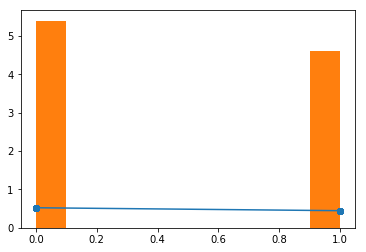

In [222]:
GNDRNormality = sorted(df['GNDR'])
fit_GNDR = stats.norm.pdf(GNDRNormality, np.mean(GNDRNormality), np.std(GNDRNormality))  #this is a fitting indeed
plt.plot(GNDRNormality,fit_GNDR,'-o')
plt.hist(GNDRNormality,normed=True)

###### Not sure there is any normality to be spoken of here. I guess Normal? It is fairly even on both sides. We know there are more Females than Males. 

In [223]:
GNDRThreeDecimal = stats.normaltest(df['GNDR'])

print "The chi-square statistic is %.3f and the p-value is %.3f." % GNDRThreeDecimal

The chi-square statistic is 25.457 and the p-value is 0.000.


###### Our null hypothesis is that there is no difference between Genders  when it comes to defecting.

In [224]:
female_GNDR_defect = df[df['GNDR'] == 0]['Y2defect']
male_GNDR_defect = df[df['GNDR'] == 1]['Y2defect']
stats.ttest_ind(female_GNDR_defect, male_GNDR_defect)

Ttest_indResult(statistic=0.20264079456930181, pvalue=0.83942243830338859)

###### Because the pvalue is greater than .05, we will accept the null hypothesis.
- There is not a significant relationship between male and female genders, when it comes to defecting.

(array([  4.89022503e-03,   7.24306915e-03,   2.20901397e-03,
          1.04751768e-03,   5.83461921e-04,   3.85356246e-04,
          1.98105676e-04,   1.30261266e-04,   9.76959496e-05,
          7.86995149e-05]),
 array([   0. ,   59.3,  118.6,  177.9,  237.2,  296.5,  355.8,  415.1,
         474.4,  533.7,  593. ]),
 <a list of 10 Patch objects>)

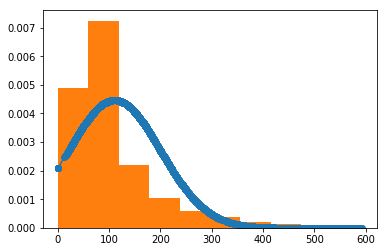

In [225]:
HOMEVALNormality = sorted(df['HOMEVAL'])
fit_HOMEVAL = stats.norm.pdf(HOMEVALNormality, np.mean(HOMEVALNormality), np.std(HOMEVALNormality))  #this is a fitting indeed
plt.plot(HOMEVALNormality,fit_HOMEVAL,'-o')
plt.hist(HOMEVALNormality,normed=True)

###### Normality seems normal, perhaps a bit skewed toward the higher end. 

In [226]:
HOMEVALThreeDecimal = stats.normaltest(df['HOMEVAL'])

print "The chi-square statistic is %.3f and the p-value is %.3f." % HOMEVALThreeDecimal

The chi-square statistic is 2945.259 and the p-value is 0.000.


###### Our null hypothesis is that there is no difference between high and low home values, when it comes to defecting.

In [269]:
low_HOMEVAL_defect = df[df['HOMEVAL'] <= 150.0]['Y2defect']
high_HOMEVAL_defect = df[df['HOMEVAL'] > 150.0]['Y2defect']
stats.ttest_ind(low_HOMEVAL_defect, high_HOMEVAL_defect)

Ttest_indResult(statistic=-2.1590083809639515, pvalue=0.030887684154058077)

###### Because the pvalue is less than .05, we will reject the null hypothesis in favor of the alternative.
- There is a significant relationship between high and low home values, when it comes to defecting.

In [228]:
df.corr()

,Y2defect,Y1price,Y1Games,YEARS,BACKER,AGE,INCOME,GNDR,HOMEVAL
Y2defect,1.000000,-0.011480,-0.158519,-0.127372,-0.181988,-0.020781,0.011495,-0.002571,0.035777
Y1price,-0.011480,1.000000,0.027867,0.037318,-0.097641,-0.038765,0.076975,0.050314,0.088744
Y1Games,-0.158519,0.027867,1.000000,0.214446,0.225798,0.054177,-0.003783,0.000095,-0.001512
YEARS,-0.127372,0.037318,0.214446,1.000000,0.527847,0.317249,-0.093972,0.002046,-0.030175
BACKER,-0.181988,-0.097641,0.225798,0.527847,1.000000,0.200165,-0.092481,-0.010527,-0.075744
AGE,-0.020781,-0.038765,0.054177,0.317249,0.200165,1.000000,-0.249764,0.019354,-0.010251
INCOME,0.011495,0.076975,-0.003783,-0.093972,-0.092481,-0.249764,1.000000,0.075569,0.313184
GNDR,-0.002571,0.050314,0.000095,0.002046,-0.010527,0.019354,0.075569,1.000000,0.031960
HOMEVAL,0.035777,0.088744,-0.001512,-0.030175,-0.075744,-0.010251,0.313184,0.031960,1.000000


# Model Development

### Decision Tree

In [242]:
y = df['Y2defect']

X = df[['Y1Games','YEARS','BACKER']]




#X = df[['Y1Games','BACKER']]
#0.590463764582

#X = df[['Y1Games','YEARS','BACKER']]
#0.591489599051

#X = df[['Y1price','Y1Games','YEARS','BACKER']]
#0.583055215655

#X = df[['Y1price','Y1Games','YEARS','BACKER','HOMEVAL']]
#0.534578786847



#Of my testing, this is as good as it gets. 

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [244]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [245]:
print metrics.accuracy_score(y_test, dt.predict(X_test))
print metrics.confusion_matrix(y_test, dt.predict(X_test))
print metrics.classification_report(y_test, dt.predict(X_test))
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.591957104558
[[645 292]
 [469 459]]
             precision    recall  f1-score   support

          0       0.58      0.69      0.63       937
          1       0.61      0.49      0.55       928

avg / total       0.60      0.59      0.59      1865

0.591489599051


In [246]:
output_scoring = dt.predict(X)

In [247]:
output_scoring

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

### Logistic Regression

In [248]:
y = df['Y2defect']
X = df.drop(['Y2defect'], axis=1)

In [249]:
X.head(2)

,Y1price,Y1Games,YEARS,BACKER,AGE,INCOME,GNDR,HOMEVAL
0,15,3,8,1,94,4,0,203
2,15,2,11,1,67,2,0,38


In [250]:
# evaluate the model by splitting into train and test sets and build a logistic regression model
# name it as "lr"
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [251]:
print metrics.accuracy_score(y_test, lr.predict(x_test))
print metrics.confusion_matrix(y_test, lr.predict(x_test))
print metrics.classification_report(y_test, lr.predict(x_test))
print metrics.roc_auc_score(y_test, lr.predict(x_test))

0.575871313673
[[558 379]
 [412 516]]
             precision    recall  f1-score   support

          0       0.58      0.60      0.59       937
          1       0.58      0.56      0.57       928

avg / total       0.58      0.58      0.58      1865

0.575776046075


In [252]:
# generate class probabilities
probs = lr.predict_proba(x_test)
print probs

[[ 0.50675684  0.49324316]
 [ 0.35698014  0.64301986]
 [ 0.38264942  0.61735058]
 ..., 
 [ 0.56071423  0.43928577]
 [ 0.48003633  0.51996367]
 [ 0.40425018  0.59574982]]


#### It looks like the Decision Tree is still the better option here.

# Storytelling

## Who is likely to renew Season Tickets?

- Those who have attended 3 or more Games in Year 1.
- Those who have been Season Ticket holders for 6 or more years.
- Those who are a part of the Backer Club.
- Those whose Home Values are below 150(thousand dollars).

## Who is likely to defect?

- Those who have attended 2 or less Games in Year 1.
- Those who have been Season Ticket holders for 5 or less years.
- Those who are not a part of the Backer Club.
- Those whose Home Values are at or above 150(thousand dollars).

## What actions do you recommend to the K-State Athletic Department to take?

- Incentivize game attendance. Advertise and provide incentives such as doorbuster type giveaways in order to get people at the game to have the game experience.
- Provide some sort of discount for consecutive Season Ticket Holders to make their Season Tickets a bit cheaper every year up to Year 5. Hopefully by this point, you have locked them in for some time after the discounts end.
- Advertise the Backer Club. Have special benefits for people in the Backer Club for a reached quota of being a backer. Benefits like meeting the team, a social event, or free or highly discounted Season Tickets. T-Shirts and other Apparel would probably help as well.
- Make sure advertising for games is available and abundant in location where Home Values are above 150,000 dollars. Also make sure you are on as many TV stations as possible to afford within reason, to best maximize your home viewership and increase the likelihood of interest in becoming a repeat Season Ticket holder. 

## What additional variables would you need to improve the model prediction?

- If the person is a student or not.
- What year the student (if a student) is at K-State. 
- If the person is an alumni.

## Any other suggestions?

- The Price of the Season Ticket doesn't seem to weigh to heavily on the choice to renew or defect.
- It seems there is a slight sentiment that the older someone gets the more likely they are to renew. However one could only assume there comes a cut off age where that no longer remains true.
- Because Home Value is highly correlated with Income, one could presume that those with Incomes in the category of >= 4 are also likely to defect.